IPython: 3.1.0
numpy: 1.9.2
scipy: 0.15.1
matplotlib: 1.4.3
scikit-learn: 0.16.1
seaborn 0.5.1
pandas 0.16.0


In [4]:
%matplotlib inline

In [5]:
seaborn.set()

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a two-dimensional array or matrix. The arrays can be either numpy arrays, or in some cases scipy.sparse matrices. The size of the array is expected to be [n_samples, n_features]

n_samples: The number of samples: each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
n_features: The number of features or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean or discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. This is a case where scipy.sparse matrices can be useful, in that they are much more memory-efficient than numpy arrays.

###Simple Dataset Example: Irish Dataset

In [6]:
from IPython.core.display import Image, display


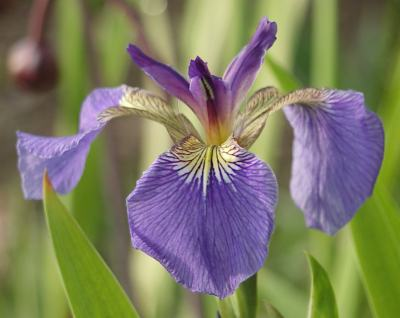

Iris Setosa



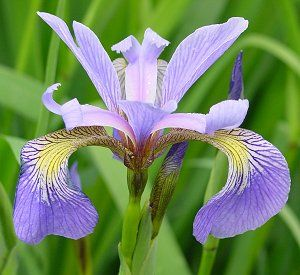

Iris Versicolor



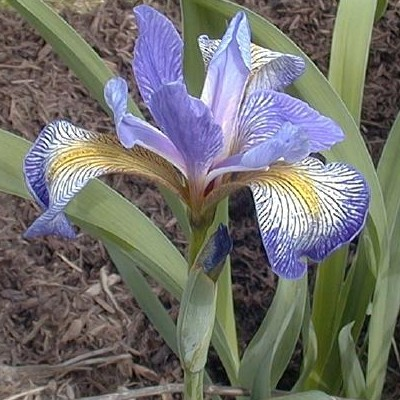

Iris Virginica


In [7]:
display(Image(filename='../notebooks/images/iris_setosa.jpg'))
print('Iris Setosa\n')

display(Image(filename='../notebooks/images/iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(filename='../notebooks/images/iris_virginica.jpg'))
print("Iris Virginica")

Load the skitlearn dataset for the Iris species. scikit-learn embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:


In [8]:
from sklearn.datasets import load_iris
iris = load_iris() #csv file

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
n_samples, n_features = iris.data.shape

In [11]:
irisDF = pd.DataFrame(data=iris.data, columns = [iris.feature_names]) # X Values
irisTargetSeries = pd.Series(iris.target) # Y Values

In [12]:
print(irisDF.shape) #[n_samples, n_features]

(150, 4)


In [13]:
print(irisTargetSeries.shape) #[n_samples]

(150,)


In [14]:
irisNames = iris.target_names #the different classification types

In [15]:
irisNames.view() 

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

###Explore/Visualize the Data

We have four dimensional data (four features). We can't plot in four dimensions but we can do some 2-dimensional plots to get a feel for the data. This is a basic example of what we are trying to do in dimensionality reduction!

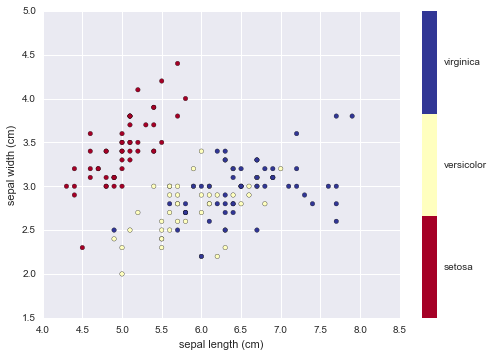

In [16]:
xFeature = 'sepal length (cm)'
yFeature = 'sepal width (cm)'

#formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: irisNames[int(i)])

plt.scatter(irisDF.loc[:, xFeature], irisDF.loc[:, yFeature], c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0,1,2], format =formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(xFeature)
plt.ylabel(yFeature)
plt.show()

Aside: Other available data from sklearn
- Packaged Data sklearn.datasets.load_
- Downloaable Data sklearn.datasets.fetch_
- Generated Data sklearn.datasets.make_

##Basic Principles

Look at the Estimator object of sklearn and do **supervised learning** examples including classification and regression as well as **unsupervised learning** examples including clustering and dimensionality reduction

###The Sklearn Estimator Object

Every algorithm is exposed via an sklearn 'Estimator' object. All parameters of the estimator can be set at initilization and have suitable default values

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
demoModel = LinearRegression(normalize=True)
print(demoModel.normalize)

True


In [19]:
print(demoModel) #shows the params we have set and those we didnt set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


**Key:** When the data is fit with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object we instantiated are can be accessed via the underscore (because they are internal!) 

In [20]:
x = np.arange(10)
y = 2 * x +1

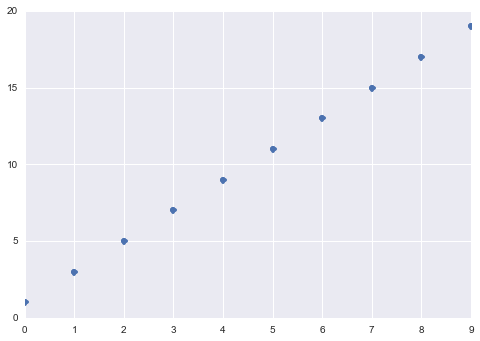

In [21]:
plt.plot(x, y, 'o')

In [22]:
#Lets take a look at the dimensions of our data
print(x.shape)
print(y.shape)

(10,)
(10,)


In [23]:
#sklearn estimators require 2D data 
X = x[:, np.newaxis] #this turns x (a row vector) into a collumn vector

In [24]:
#fit model on our data
demoModel.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [25]:
#underscore indicates a 'fit' parameter
print(demoModel.coef_)
print(demoModel.intercept_)

[ 2.]
1.0


In [26]:
#residual error around fit
demoModel.residues_

3.944304526105059e-31

###Supervised Learning: Classification and Regression

The task is to construct an estimator which is able to predict the label of an object given the set of features. **Key** is that these objects have one or more unobserved properties that we need to identity/predict via other observed properties


Some cool examples
- predict if telescope image is start, galaxy, or quasar
- identity person in a photo
- reccommend systems (e.g. netflix)

Supervised Learning is broken down into two categories
- classification (discrete label)
- regression (continuous label)

####Classification Example: K-Nearest-Neighbours

Given an unknown observation, look up in your reference database which ones have the closest features and assign the predominant class

In [27]:
from sklearn import neighbors, datasets

In [28]:
iris = datasets.load_iris()

In [29]:
irisX = pd.DataFrame(data=iris.data, columns = iris.feature_names)
irisY = pd.Series(iris.target)
irisClassifications = iris.target_names

In [30]:
print('x shape', irisX.shape)
print('y shape', irisY.shape)

x shape (150, 4)
y shape (150,)


In [31]:
irisX

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [32]:
#create our model
kNearestNeighbors = neighbors.KNeighborsClassifier(n_neighbors = 5) 

In [33]:
#fit our model
kNearestNeighbors.fit(irisX, irisY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [34]:
#predict what kind of flower has 3*5 sepal and 4*2 petal
irisTestPrediction = kNearestNeighbors.predict([[3,5,4,2]]) #[n_samples, n_features]

In [35]:
print(irisClassifications[irisTestPrediction])

['versicolor']


In [36]:
#can also do this via predict
irisProbabilityPrediction = kNearestNeighbors.predict_proba([[3,5,4,2]])
print('likelihood of each type', irisProbabilityPrediction)

likelihood of each type [[ 0.   0.8  0.2]]


In [37]:
from fig_code import plot_iris_knn

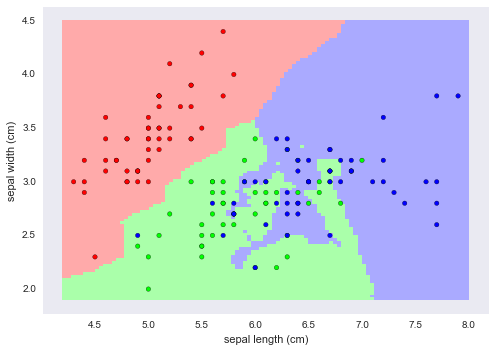

In [38]:
#this is what the Knearest-Neighbours does/looks like on our example
plot_iris_knn()

####Classification Example: SVM SVC

In [39]:
from sklearn.svm import SVC

In [40]:
irisSVM = SVC(probability=True)

In [41]:
irisSVM.fit(irisX, irisY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [42]:
irisSVMPrediction = irisSVM.predict([[3,5,4,2]])

In [43]:
print('prediction', irisClassifications[irisSVMPrediction])

prediction ['virginica']


In [44]:
irisSVMProbabilityPrediction = irisSVM.predict_proba([[3,5,4,2]])

In [45]:
irisSVMProbabilityPrediction

array([[ 0.22216819,  0.30823343,  0.46959839]])

In [46]:
#Plot SVM output

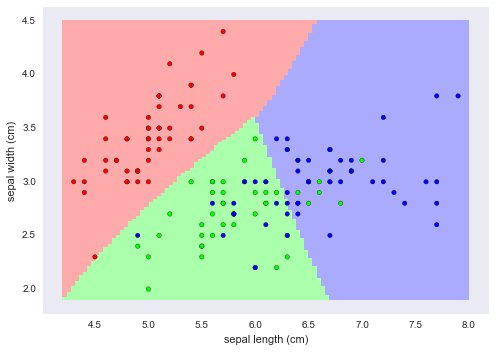

In [47]:
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                        # avoid this ugly slicing by using a two-dim dataset
y = iris.target

irisSVM = SVC(probability=True)
irisSVM.fit(X, y)
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),np.linspace(y_min, y_max, 100))
Z = irisSVM.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

plt.show()

###Regression Example

####Simple OLS Regression

In [48]:
#create simple data
np.random.seed(0)
X = np.random.random(size=(20,1))
Y = 3* X.squeeze() + 2 + np.random.randn(20)

In [49]:
xDF = pd.DataFrame(X)
ySeries = pd.Series(Y)

In [50]:
print('shape of x', xDF.shape)
print('shape of y', ySeries.shape)

shape of x (20, 1)
shape of y (20,)


In [51]:
xDF

,0
0,0.548814
1,0.715189
2,0.602763
3,0.544883
4,0.423655
5,0.645894
6,0.437587
7,0.891773
8,0.963663
9,0.383442


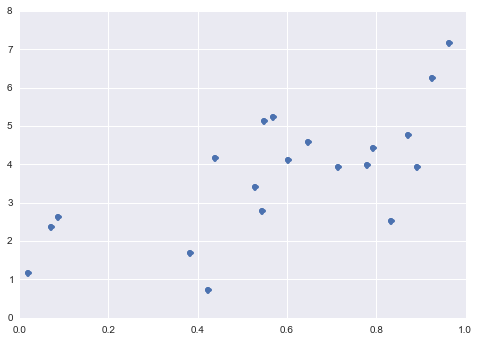

In [52]:
plt.plot(xDF, ySeries, 'o')

In [53]:
OLSModel = LinearRegression()

In [54]:
OLSModel.fit(xDF, ySeries)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
#Plot data and model's predictions
xFit = np.linspace(0, 1, 100)
xFit = xFit[:, np.newaxis] #convert to column vector
xFitDF = pd.DataFrame(xFit)
yFit = OLSModel.predict(xFitDF)


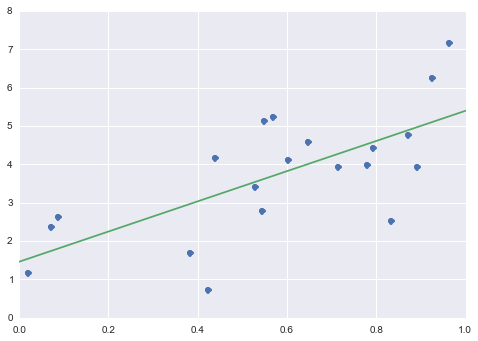

In [56]:
plt.plot(xDF, ySeries, 'o') #makes it plot points
plt.plot(xFit, yFit) #plots connecting line by default (striaght because OLS!)

####Random Forest

In [57]:
#Grab the random forest classifier from sklearn's ensemble methods
from sklearn.ensemble import RandomForestRegressor
randomForestModel = RandomForestRegressor(n_estimators=50)


In [58]:
randomForestModel.fit(xDF, ySeries)

#plot data and the model prediction
xFit = np.linspace(0, 1, 100)
xFit = xFit[:, np.newaxis] #convert to a column vector
yFit = randomForestModel.predict(xFit)

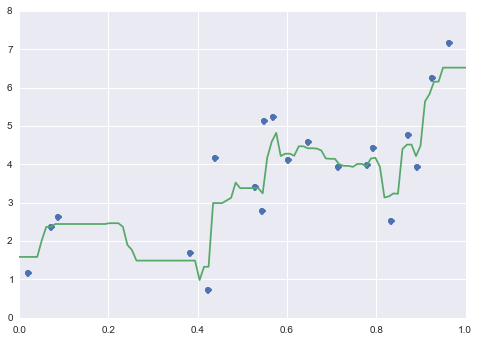

In [59]:
#plot results
plt.plot(xDF, ySeries, 'o')
plt.plot(xFit, yFit)

###Unsupervised Learning: Dimensionality Reduction and Clustering

Here data has no labels, we are instead interested in finding similarities between the objects in question. Think of these methods as a means for discovering labels from the data itself. Unsupervised learning involves tasks such as:
- Dimensionality Reduction
- Clustering 
- Density Estimation 

In the Iris dataset we can use input combinations to reveal labels which best display the structure of the data. We can use this to visualize multimentionsal data in two dimensions.

Examples: 
- detailed combinations of galaxies, detemrine which features or combinations of features best summarize the info
- mixture of two sound systems, seperate the two
- given a video isolate a moving object and categorize in relation to other moving objects which have been seen

**Supervised** and **unsupervised** can often be powerfully combined: Sometimes the two may even be combined: e.g. Unsupervised learning can be used to find useful features in heterogeneous data, and then these features can be used within a supervised framework.

####Dimensionality Reduction: PCA

PCA (Princical Component Analysis) is a dimension reduction technique that can find the combination of variables that explain the most variance.

E.G. Iris DS: cant be visualized in since 2D plot (4 featu4es). We extract two combinations of sepal and petal dimensions and visualize it. 

In [60]:
irisXDF = pd.DataFrame(iris.data, columns= iris.feature_names)
irisYSeries = pd.Series(iris.target)

In [61]:
print('irisX shape', irisXDF.shape)
print('irisY shape', irisYSeries.shape)

irisX shape (150, 4)
irisY shape (150,)


In [62]:
from sklearn.decomposition import PCA

In [63]:
irisPCA = PCA(n_components=2)

In [64]:
irisPCA.fit(irisXDF)

PCA(copy=True, n_components=2, whiten=False)

In [65]:
irisXReduce = irisPCA.transform(irisXDF) #this brings down the dimensionality of the data to the two most important diemnsions (features)

In [66]:
print('previous data shape', irisX.shape)
print('new data shape', irisXReduce.shape)

previous data shape (150, 4)
new data shape (150, 2)


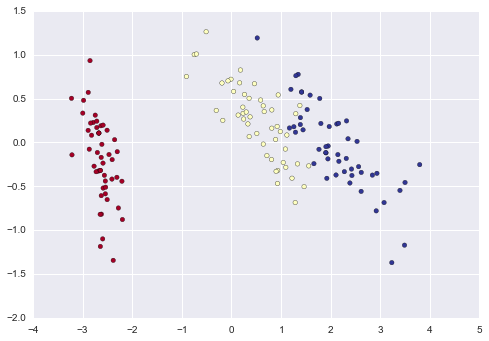

In [67]:
plt.scatter(irisXReduce[: , 0], irisXReduce[:, 1], c=irisY, cmap='RdYlBu')

###Recap-Scikit-learn's estimator interface

Uniform interface across all methods. For sckit-learn estimator object named model, following methods are available 

In all available:
- Available in **all estimators** is model.fit(). For supervised it takes x and y. For unsupervised it takes just x
- Available in **supervised estimators** model.predict(). Given trained model, predict label of new set of data. Method accepts an argument (the new data to predict on). Returns learned label for each object in the input array argument. Model.predict_proba() for classification problems, some estimators also provide this method. Returns probability that new observation has each categorical label. Label with highest probability is returned by model.predict() Model.score() for classification or regression models most (all?) estimators have a score method. Scores between 0 and 1.
- Available in **unsupervised estimators** model.predict() predicts label in clustering algorithms. model.transform() given an unsupervised model, transforms new data into the new basis. Accepts one argument and returns the new representation of data based on the unsupervised model. 
- model.fit_transform() some estimators implement this method, which more efficiently performs a fit and a transform on the same input data

###Model Validation

Determines how well model will generalize from the training data to future unlabeled data. 

In [68]:
from sklearn.neighbors import KNeighborsClassifier 

In [69]:
irisXDF = pd.DataFrame(iris.data)
irisYSeries = pd.Series(iris.target)

In [70]:
print ('shape of x ', irisXDF.shape)
print ('shape of y ', irisYSeries.shape)

shape of x  (150, 4)
shape of y  (150,)


In [71]:
irisKNClassifier = KNeighborsClassifier(n_neighbors=1) #number of neighbors to look at 

In [72]:
irisKNClassifier.fit(irisXDF, irisYSeries)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [73]:
irisPredictions = irisKNClassifier.predict(irisXDF)

In [74]:
print (np.all(irisYSeries==irisPredictions)) #see if all predictions correct

True


More useful is to look at the confusion matrix (matrix showing frequency of inputs and outputs0

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
print('KNearestNeighbors confusion matrix \n')
print(confusion_matrix(irisYSeries, irisPredictions))

KNearestNeighbors confusion matrix 

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


Here for each class all 50 training samples are identified correctly. Model not necessarily perfect though! What we will find is our model generalizes horribly to new data. Show this by splitting data into training set and testing set.

Skitlearn helps us do this with the cross-validation module

####Cross-Validation

In [77]:
from sklearn.cross_validation import train_test_split

In [78]:
xTrain, xTest, yTrain, yTest = train_test_split(irisXDF, irisYSeries)

In [79]:
print('shape of xTrain', xTrain.shape)
print('shape of xTest', xTest.shape)
print('shape of yTrain', yTrain.shape)
print('shape of yTest', yTest.shape)

shape of xTrain (112, 4)
shape of xTest (38, 4)
shape of yTrain (112,)
shape of yTest (38,)


In [80]:
validationCLF = KNeighborsClassifier(n_neighbors=1) 

In [81]:
validationCLF.fit(xTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [82]:
validationCLFPredictions = validationCLF.predict(xTest)

In [83]:
validationCLFPredictions

array([2, 2, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0,
       0, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 2, 0, 2])

In [84]:
#Look at our confusion_matrix

In [85]:
print('K nearest neighbors confusion matrix with new data \n')
print(confusion_matrix(yTest, validationCLFPredictions))

K nearest neighbors confusion matrix with new data 

[[12  0  0]
 [ 0 12  0]
 [ 0  0 14]]


We actually did really well here but this may point out confusion between different species

##Application: Optical Character Recognition

###Load and Visualize the Digits

In [86]:
from sklearn import datasets

In [87]:
digits = datasets.load_digits()

In [88]:
digitNames= digits.target_names

In [89]:
digitXDF = pd.DataFrame(digits.data)

In [90]:
digitYSeries = pd.Series(digits.target)

In [91]:
print('shape of x', digitXDF.shape)
print('shape of y', digitYSeries.shape)

shape of x (1797, 64)
shape of y (1797,)


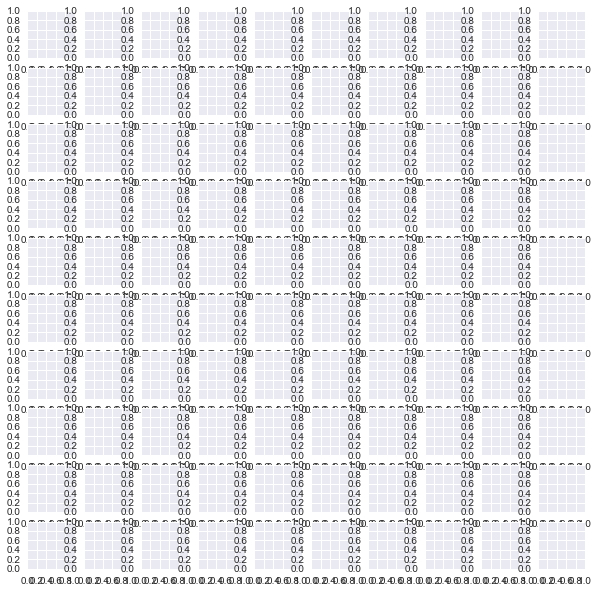

In [119]:
#Plot some of the samples
digitsFig, digitsAxes = plt.subplots(10,10, figsize=(10,10))

In [120]:
digitsFig.subplots_adjust(hspace=0.1, wspace=0.1)

In [121]:
for i, ax in enumerate(digitsAxes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')


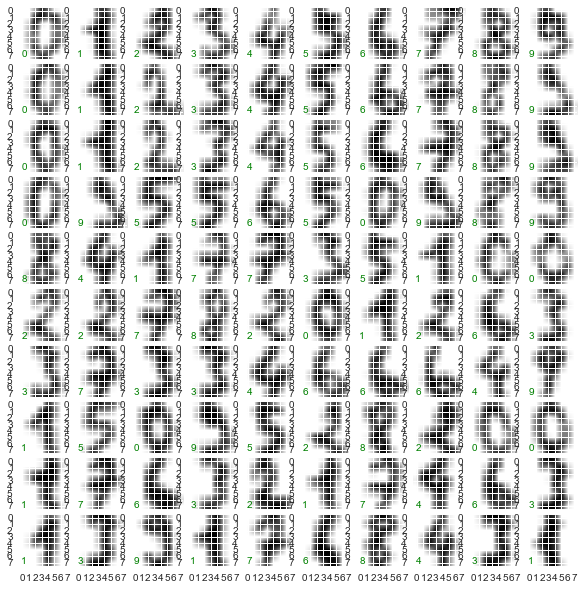

In [123]:
#Data here is each pixel value with an 8x8 grid (I did 10 by 10 cause i dont understand matplotlibs dimensions)
digitsFig

In [126]:
#Look at the images themselves (8*8 pixel values)
print(digitXDF.shape)

(1797, 64)


In [129]:
digitXDF

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,0,6,13,10,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,0,11,16,10,0,0
2,0,0,0,4,15,12,0,0,0,0,...,5,0,0,0,0,3,11,16,9,0
3,0,0,7,15,13,1,0,0,0,8,...,9,0,0,0,7,13,13,9,0,0
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,0,2,16,4,0,0
5,0,0,12,10,0,0,0,0,0,0,...,4,0,0,0,9,16,16,10,0,0
6,0,0,0,12,13,0,0,0,0,0,...,8,0,0,0,1,9,15,11,3,0
7,0,0,7,8,13,16,15,1,0,0,...,0,0,0,0,13,5,0,0,0,0
8,0,0,9,14,8,1,0,0,0,0,...,8,0,0,0,11,16,15,11,1,0
9,0,0,11,12,0,0,0,0,0,2,...,4,0,0,0,9,12,13,3,0,0


###Unsupervised Learning: Dimensionality Reduction

We really want to visualize our values in the 64 feature space, plotting in 64 dimensions isn't possible for our feeble minds though :(

Instead we are going to reduce to 2 dimensions using an unsupervised learning method. We make use of a manifold learning algorithm called Isomap and transform the data into 2 dimensions

In [130]:
from sklearn.manifold import Isomap 

In [134]:
digitsISO = Isomap(n_components=2)
data_projected = digitsISO.fit_transform(digitXDF)

In [138]:
print('shape of projected data \n', data_projected)

shape of projected data 
 [[-167.27247954   22.18515653]
 [  48.71476497   51.30840484]
 [ 100.719723     25.82132196]
 ..., 
 [  51.43618206  -23.29369929]
 [   0.22056414  -73.32775967]
 [  11.36581193  -36.23661186]]


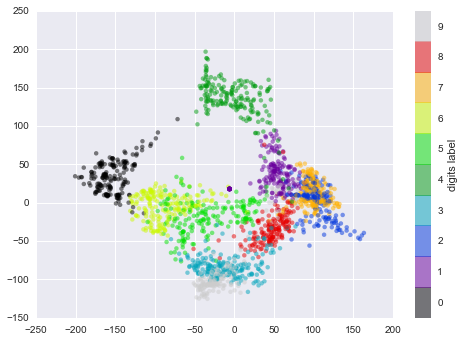

In [139]:
#Plot our projected digit data
plt.scatter(data_projected[: , 0], data_projected[: , 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar(label='digits label', ticks=range(10))
plt.clim(-0.5, 9.5)

From this projected graph there seems to be a good seperation between the data. This means that a supervised algorithm should actually perform quite well. 

###Supervised Learning: Logistic Regression on the Digits Data

In [144]:
#Set up our cross validation
from sklearn.cross_validation import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(digitXDF, digitYSeries, random_state=2)

In [145]:
print('shape of trainingX', xTrain.shape)
print('shape of trainingY', yTrain.shape)

shape of trainingX (1347, 64)
shape of trainingY (1347,)


In [146]:
from sklearn.linear_model import LogisticRegression


In [165]:
logisticDigitClassifier = LogisticRegression(penalty='l2') #penalty is to try to prevent overfitting

In [166]:
logisticDigitClassifier.fit(xTrain, yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [168]:
digitPredictions = logisticDigitClassifier.predict(xTest)

In [171]:
#Compare our logistic regression classifier by comparing true values of test against the predictions
from sklearn.metrics import accuracy_score

In [174]:
accuracy_score(yTest, digitPredictions) #gives us an overall score

0.94666666666666666

In [177]:
#We want to know where we specifically went wrong
from sklearn.metrics import confusion_matrix

In [179]:
confusion_matrix(yTest, digitPredictions) #looks like 4 and 5 were confusing

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  1,  0,  0,  0,  0,  3,  1],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  2,  0,  3,  1,  0],
       [ 0,  2,  0,  0, 36,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0, 52,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  1,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  2, 34]])

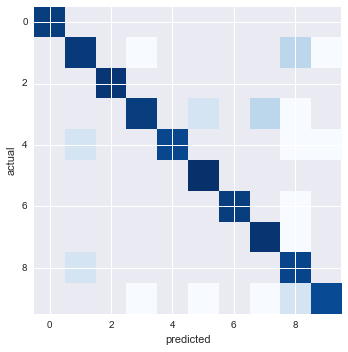

In [184]:
plt.imshow(np.log(confusion_matrix(yTest, digitPredictions)), cmap='Blues', interpolation='nearest')
plt.ylabel('actual') #pretty damn cool
plt.xlabel('predicted') 

Another awesome way to visualize is to print out our numbers again and label the correct/incorrectly predicted ones green and red respectively

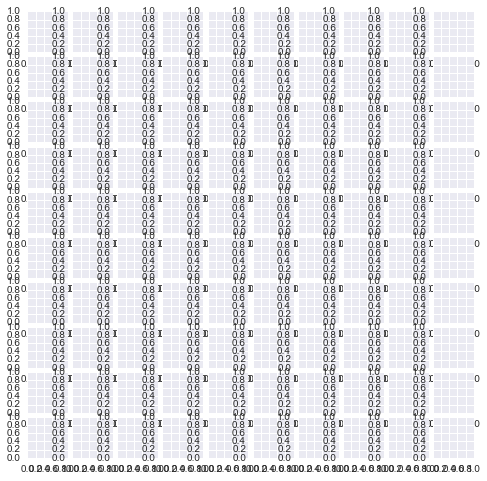

In [194]:
fig, axes = plt.subplots(10,10, figsize=(8,8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

In [199]:
xTest = digits.data

In [203]:
#Cant seem to make this work right now
# for i, ax in enumerate(axes.flat):
#     ax.imshow(xTest[i].reshape(8,8), cmap='binary')
#     ax.text(0.05, 0.05, str(digitPredictions[i]), transform=ax.transAxes, color='green' if yTest[i] == digitPredictions[i] else 'red')

In [1]:
!ls

.ipynb_checkpoints                       Supervised-Learning-Random-Forests.ipynb images
Intro.ipynb                              Supervised-Learning.ipynb
Overview.ipynb                           fig_code


In [3]:
%shortcut

ERROR: Line magic function `%shortcut` not found.


In [7]:
%%HTML <h1>HI</h1>

UsageError: %%HTML is a cell magic, but the cell body is empty.

##